In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px

df = pd.read_csv("df_tourist_python_sprint2.csv", sep= ';')

df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.0,1.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,...,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,2020-01-10
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,2019-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,Espectacular habitaci�n,NaN,238089984,Sant Antoni,Eixample,Private room,1,1.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,88.0,spain,barcelona,2019-10-16
7689,32392774,? Tu Hogar de Lujo ????? en el Centro de Sevilla,"Exclusivo, amplio y luminoso alojamiento situa...",243246681,Arenal,Casco Antiguo,Entire home/apt,6,2.0,3.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,157.0,spain,sevilla,2021-01-31
7690,32395123,Rooms by G Bella Mar�a 3,The 2-star Bella Maria has 24-hourreception an...,159933359,Felanitx,NaN,Entire home/apt,2,1.0,1.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,mallorca,2019-04-24
7691,32407332,LUMINOSO Y ENCANTADOR PISO CERCA DE TODO,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,187631805,Proven�als del Poblenou,Sant Mart�,Private room,3,2.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,389.0,spain,barcelona,2019-08-12


In [8]:
df["amstr"] =  df['amenities_list'].astype(str)
separador = df["amstr"].str.count(",") + 1
separador.name = "comoditats"
df_amenities = pd.concat([df, separador], axis=1)
df_amenities[["city","neighbourhood_name","accommodates","price","comoditats", "review_scores_rating"]]

,city,neighbourhood_name,accommodates,price,comoditats,review_scores_rating
0,malaga,Centro,2,400.0,19,97.0
1,madrid,C�rmenes,1,170.0,31,92.0
2,sevilla,San Vicente,4,990.0,34,98.0
3,barcelona,l'Antiga Esquerra de l'Eixample,2,400.0,27,94.0
4,girona,Quart,5,900.0,43,97.0
...,...,...,...,...,...,...
7688,barcelona,Sant Antoni,1,3000.0,12,94.0
7689,sevilla,Arenal,6,2090.0,27,100.0
7690,mallorca,Felanitx,2,930.0,9,96.0
7691,barcelona,Proven�als del Poblenou,3,960.0,30,98.0


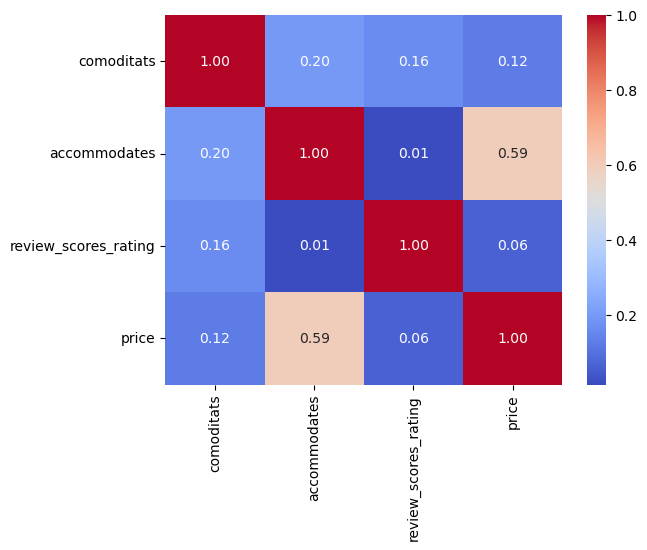

In [9]:
tcorr = df_amenities[['comoditats', 'accommodates', 'review_scores_rating', 'price']]
corre = tcorr.corr()
sns.heatmap(corre, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [10]:
# Seleccionem les variables d'interès
variables = ["comoditats", "accommodates", "review_scores_rating"]

# Codifiquem la ciutat com a variable dummy (si vols incloure la ciutat al model)
df_model = pd.get_dummies(df_amenities, columns=["city"], drop_first=True)

# Variables independents (X) i dependent (y)
X = df_model[variables + [col for col in df_model.columns if col.startswith("city_")]]
y = df_model["price"]

# Dividim en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenem el model
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficients del model
coeficients = pd.DataFrame({
    'variable': X.columns,
    'coeficient': model.coef_
})
print(coeficients)


               variable  coeficient
0            comoditats    1.143329
1          accommodates  175.329917
2  review_scores_rating    3.768400
3           city_girona  -80.680353
4           city_madrid -105.092174
5           city_malaga -240.060610
6         city_mallorca  245.759925
7          city_menorca  236.545008
8          city_sevilla   -8.692269
9         city_valencia -259.624710


In [11]:
# Mostrem els coeficients de manera ordenada
print(coeficients.sort_values(by="coeficient", ascending=False))


               variable  coeficient
6         city_mallorca  245.759925
7          city_menorca  236.545008
1          accommodates  175.329917
2  review_scores_rating    3.768400
0            comoditats    1.143329
8          city_sevilla   -8.692269
3           city_girona  -80.680353
4           city_madrid -105.092174
5           city_malaga -240.060610
9         city_valencia -259.624710


In [12]:
# Mitjana de cada variable per ciutat
print(df_amenities.groupby("city")[["comoditats", "accommodates", "review_scores_rating", "price"]].mean())


           comoditats  accommodates  review_scores_rating        price
city                                                                  
barcelona   19.093322      3.344096             91.038700   845.294118
girona      20.693656      5.665275             91.960768  1184.198664
madrid      21.502128      3.369605             93.079635   744.443769
malaga      25.423858      4.002538             92.454315   729.771574
mallorca    24.674308      6.120949             93.992885  1604.177866
menorca     21.994012      6.095808             93.688623  1563.353293
sevilla     26.037221      3.925558             93.709677   940.397022
valencia    24.630556      3.961111             92.100000   669.066667


In [13]:
# Prediccions sobre el test
y_pred = model.predict(X_test)

# Mètriques d'avaluació
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


R²: 0.40
MSE: 401685.45


In [19]:
# Variables d'interès
variables = ["comoditats", "accommodates", "review_scores_rating"]

# Diccionari per guardar els coeficients per ciutat
coef_dict = {}

for city in df_amenities["city"].unique():
    df_city = df_amenities[df_amenities["city"] == city]
    X = df_city[variables]
    y = df_city["price"]
    model = LinearRegression()
    model.fit(X, y)
    coef_dict[city] = model.coef_

# Convertim a DataFrame per visualitzar millor
coef_df = pd.DataFrame(coef_dict, index=variables).T
coef_df.index.name = "city"
coef_df.reset_index(inplace=True)
print(coef_df)

        city  comoditats  accommodates  review_scores_rating
0     malaga   -1.939746    119.896710              9.495328
1     madrid    0.174631    158.945914              4.696413
2    sevilla  -10.590584    161.142812              2.819347
3  barcelona    4.206476    198.740101              1.728008
4     girona   -1.305960    181.173952              6.110821
5   valencia   -5.203859    134.966354              8.262263
6   mallorca    0.431811    161.181196              7.115337
7    menorca   -1.689679    238.252356              4.634617


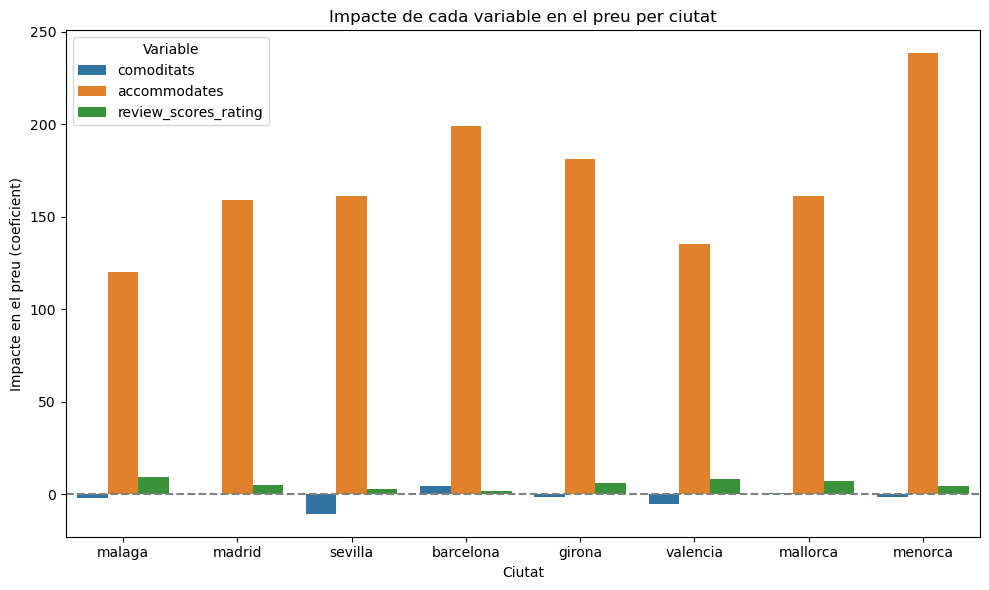

In [18]:
import matplotlib.pyplot as plt

# Fem el DataFrame long per a seaborn
coef_long = coef_df.melt(id_vars="city", var_name="Variable", value_name="Impacte")

plt.figure(figsize=(10,6))
import seaborn as sns
sns.barplot(data=coef_long, x="city", y="Impacte", hue="Variable")

plt.title("Impacte de cada variable en el preu per ciutat")
plt.ylabel("Impacte en el preu (coeficient)")
plt.xlabel("Ciutat")
plt.axhline(0, color='grey', linestyle='--')
plt.legend(title="Variable")
plt.tight_layout()
plt.show()

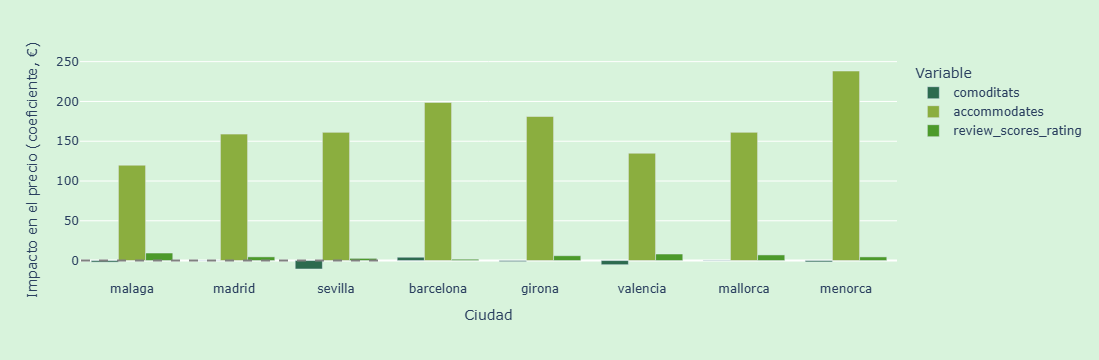

In [44]:
# Formato por Plotly
coef_long = coef_df.melt(id_vars='city', var_name='Variable', value_name='Impacte')

colors = {
    'comoditats': '#2D6A4F', 'accommodates': '#8BAE3F', 'review_scores_rating': '#4C9A2A'}

# Grafico de barras agrupadas
fig = px.bar(coef_long, x='city', y='Impacte', color='Variable', color_discrete_map=colors, barmode='group')

# Colores del fondo
fig.update_layout(
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC',
    yaxis_title='Impacto en el precio (coeficiente, €)',
    xaxis_title='Ciudad',
    legend_title_text='Variable'
)

# Linea horitzontal a y=0
fig.add_shape(
    type='line',
    x0=-0.5, x1=2.5, y0=0, y1=0,
    line=dict(color='grey', dash='dash'))

fig.show()